# Portfolio with the Maximum Sharpe Ratio for the Realty Sector

In [1]:
import random
random.seed(3)

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,1,1).date()
end = dt.datetime(2021,1,1).date()

tickers= ['DLF.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS',
         'PRESTIGE.NS', 'BRIGADE.NS', 'IBREALEST.NS', 'SOBHA.NS', 'SUNTECK.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  PRESTIGE.NS  \
Date                                                                            
2017-01-02      NaN            NaN            NaN            NaN          NaN   
2017-01-03  0.00295        0.02391       -0.00545       -0.00461      0.00385   
2017-01-04  0.05418        0.00763        0.00048       -0.00556      0.00914   
2017-01-05  0.00916        0.00417        0.00951       -0.00346      0.01168   
2017-01-06 -0.00079       -0.02723       -0.02442       -0.02269     -0.00520   
...             ...            ...            ...            ...          ...   
2020-12-24 -0.01202       -0.00804       -0.03737        0.01027      0.00282   
2020-12-28  0.03140        0.04406        0.00816       -0.00700      0.02118   
2020-12-29 -0.00750       -0.01345        0.01767        0.02501     -0.01542   
2020-12-30  0.01944       -0.00804        0.03820        0.00899     -0.01230   
2020-12-31 -0.01314        0.02755        0.02720        0.01507      0.00453   

            BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
Date                                                        
2017-01-02         NaN           NaN       NaN         NaN  
2017-01-03     0.01019       0.00330   0.01804     0.05283  
2017-01-04    -0.00651       0.05588   0.01441     0.04805  
2017-01-05     0.00262      -0.01308   0.01056    -0.00629  
2017-01-06    -0.00196       0.00568   0.01273    -0.00755  
...                ...           ...       ...         ...  
2020-12-24     0.02593       0.01827   0.03246     0.05778  
2020-12-28    -0.00081       0.08144   0.04590    -0.00029  
2020-12-29    -0.00870      -0.02234   0.00564    -0.00043  
2020-12-30     0.00490       0.03525   0.07353     0.01903  
2020-12-31     0.01219       0.03657   0.08405    -0.02275  

[988 rows x 9 columns]

In [4]:
df.tail()

DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  PRESTIGE.NS  \
Date                                                                            
2020-12-24 -0.01202       -0.00804       -0.03737        0.01027      0.00282   
2020-12-28  0.03140        0.04406        0.00816       -0.00700      0.02118   
2020-12-29 -0.00750       -0.01345        0.01767        0.02501     -0.01542   
2020-12-30  0.01944       -0.00804        0.03820        0.00899     -0.01230   
2020-12-31 -0.01314        0.02755        0.02720        0.01507      0.00453   

            BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
Date                                                        
2020-12-24     0.02593       0.01827   0.03246     0.05778  
2020-12-28    -0.00081       0.08144   0.04590    -0.00029  
2020-12-29    -0.00870      -0.02234   0.00564    -0.00043  
2020-12-30     0.00490       0.03525   0.07353     0.01903  
2020-12-31     0.01219       0.03657   0.08405    -0.02275

In [5]:
mean_returns = df.mean() 
cov_matrix = df.cov()

print(mean_returns)
print(cov_matrix)

DLF.NS           0.001151
GODREJPROP.NS    0.001928
OBEROIRLTY.NS    0.000985
PHOENIXLTD.NS    0.001044
PRESTIGE.NS      0.000991
BRIGADE.NS       0.001275
IBREALEST.NS     0.000834
SOBHA.NS         0.000975
SUNTECK.NS       0.001546
dtype: float64
                 DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  \
DLF.NS         0.000848       0.000338       0.000234       0.000177   
GODREJPROP.NS  0.000338       0.000777       0.000224       0.000117   
OBEROIRLTY.NS  0.000234       0.000224       0.000686       0.000116   
PHOENIXLTD.NS  0.000177       0.000117       0.000116       0.000618   
PRESTIGE.NS    0.000320       0.000276       0.000235       0.000137   
BRIGADE.NS     0.000258       0.000177       0.000159       0.000126   
IBREALEST.NS   0.000501       0.000307       0.000198       0.000136   
SOBHA.NS       0.000261       0.000264       0.000214       0.000097   
SUNTECK.NS     0.000289       0.000253       0.000183       0.000122   

               PRESTIGE.NS  BR

In [6]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
import random
random.seed(3)

In [8]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [9]:
result

array([[0.31140837, 0.29768481, 1.04610098, ..., 0.18641082, 0.06049416,
        0.1911081 ],
       [0.3104858 , 0.28101745, 1.10486305, ..., 0.02416118, 0.17993425,
        0.19394933],
       [0.30249127, 0.27966465, 1.08162142, ..., 0.05248033, 0.15764166,
        0.19229479],
       ...,
       [0.29486631, 0.27532372, 1.07098041, ..., 0.08361098, 0.13100152,
        0.13118576],
       [0.31992686, 0.27299074, 1.17193302, ..., 0.03611347, 0.11544499,
        0.13317198],
       [0.28709726, 0.29115899, 0.98604978, ..., 0.1934673 , 0.0774351 ,
        0.13679154]])

In [10]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean',
 'sd',
 'Sharpe',
 'DLF.NS',
 'GODREJPROP.NS',
 'OBEROIRLTY.NS',
 'PHOENIXLTD.NS',
 'PRESTIGE.NS',
 'BRIGADE.NS',
 'IBREALEST.NS',
 'SOBHA.NS',
 'SUNTECK.NS']

In [11]:
result = pd.DataFrame(result,columns=columns)
result

mean        sd    Sharpe    DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  \
0     0.311408  0.297685  1.046101  0.104892       0.126051       0.118254   
1     0.310486  0.281017  1.104863  0.143217       0.087027       0.029753   
2     0.302491  0.279665  1.081621  0.043954       0.069770       0.196335   
3     0.305960  0.279754  1.093674  0.003323       0.083417       0.206063   
4     0.274932  0.291045  0.944638  0.107734       0.018365       0.148391   
...        ...       ...       ...       ...            ...            ...   
9995  0.321115  0.284994  1.126744  0.100098       0.207999       0.044477   
9996  0.286669  0.271354  1.056438  0.065303       0.101715       0.149289   
9997  0.294866  0.275324  1.070980  0.145776       0.073955       0.052754   
9998  0.319927  0.272991  1.171933  0.178120       0.151048       0.144712   
9999  0.287097  0.291159  0.986050  0.096166       0.067525       0.125980   

      PHOENIXLTD.NS  PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS  SOBHA.NS  \
0          0.023716     0.071211    0.117863      0.186411  0.060494   
1          0.089508     0.143346    0.109104      0.024161  0.179934   
2          0.014835     0.127025    0.145663      0.052480  0.157642   
3          0.012331     0.142023    0.200415      0.002807  0.184780   
4          0.014012     0.209059    0.184214      0.075181  0.192115   
...             ...          ...         ...           ...       ...   
9995       0.101342     0.191786    0.106858      0.089824  0.064006   
9996       0.145567     0.113918    0.122687      0.125349  0.138341   
9997       0.166232     0.144006    0.071478      0.083611  0.131002   
9998       0.103674     0.006030    0.131686      0.036113  0.115445   
9999       0.091578     0.136426    0.074632      0.193467  0.077435   

      SUNTECK.NS  
0       0.191108  
1       0.193949  
2       0.192295  
3       0.164841  
4       0.050930  
...          ...  
9995    0.093611  
9996    0.037831  
9997    0.131186  
9998    0.133172  
9999    0.136792  

[10000 rows x 12 columns]

In [12]:
result.shape

(10000, 12)

In [13]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

mean             0.345628
sd               0.266019
Sharpe           1.299259
DLF.NS           0.069252
GODREJPROP.NS    0.202613
OBEROIRLTY.NS    0.060245
PHOENIXLTD.NS    0.200303
PRESTIGE.NS      0.014439
BRIGADE.NS       0.205910
IBREALEST.NS     0.004195
SOBHA.NS         0.041044
SUNTECK.NS       0.202001
Name: 3143, dtype: float64


In [14]:
Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean             0.309316
sd               0.255121
Sharpe           1.212429
DLF.NS           0.011089
GODREJPROP.NS    0.134908
OBEROIRLTY.NS    0.171488
PHOENIXLTD.NS    0.244269
PRESTIGE.NS      0.038379
BRIGADE.NS       0.198308
IBREALEST.NS     0.027380
SOBHA.NS         0.091783
SUNTECK.NS       0.082395
Name: 7988, dtype: float64


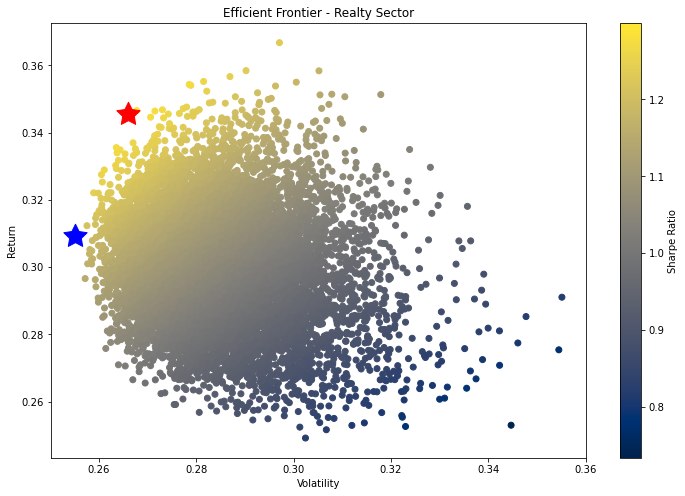

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Efficient Frontier - Realty Sector')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()